In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [28]:
df = pd.read_csv('fifa_variables.csv')

In [29]:
df = df[~df['Ranking'].isna()]

In [30]:
df.head(5)

,Country Name,Country Code,Year,Unemployment Rate,PIB p/c,Population,Life Expectancy,Gini Index,Current Health Expenditure,Primary Completion Rate,Prevelance of Food Insecurity,Ranking,Puntos Totales
0,Afghanistan,AFG,2013,NaN,651.987862,31541209,62.417,NaN,8.805941,NaN,NaN,140.0,184.0
1,Albania,ALB,2013,15.87,4413.062005,2895092,78.123,NaN,5.385611,89.539177,NaN,57.0,571.0
2,Algeria,DZA,2013,9.82,5519.777576,38000626,74.615,NaN,6.035763,106.031677,NaN,26.0,800.0
3,American Samoa,ASM,2013,NaN,12038.871590,52995,NaN,NaN,NaN,NaN,NaN,196.0,18.0
4,Andorra,AND,2013,NaN,44750.435680,71367,NaN,NaN,6.155028,NaN,NaN,198.0,17.0


In [31]:
df.columns

Index(['Country Name', 'Country Code', 'Year', 'Unemployment Rate', 'PIB p/c',
       'Population', 'Life Expectancy', 'Gini Index',
       'Current Health Expenditure', 'Primary Completion Rate',
       'Prevelance of Food Insecurity', 'Ranking', 'Puntos Totales'],
      dtype='object')

In [32]:
df.shape

(1686, 13)

In [33]:
df.head()

,Country Name,Country Code,Year,Unemployment Rate,PIB p/c,Population,Life Expectancy,Gini Index,Current Health Expenditure,Primary Completion Rate,Prevelance of Food Insecurity,Ranking,Puntos Totales
0,Afghanistan,AFG,2013,NaN,651.987862,31541209,62.417,NaN,8.805941,NaN,NaN,140.0,184.0
1,Albania,ALB,2013,15.87,4413.062005,2895092,78.123,NaN,5.385611,89.539177,NaN,57.0,571.0
2,Algeria,DZA,2013,9.82,5519.777576,38000626,74.615,NaN,6.035763,106.031677,NaN,26.0,800.0
3,American Samoa,ASM,2013,NaN,12038.871590,52995,NaN,NaN,NaN,NaN,NaN,196.0,18.0
4,Andorra,AND,2013,NaN,44750.435680,71367,NaN,NaN,6.155028,NaN,NaN,198.0,17.0


In [34]:
df['Ranking'].nunique()

211

In [35]:
# def convert_ranking(x):
#     if x<=10:
#         return 10
#     if x<=20:
#         return 20
#     if x<=30:
#         return 30
#     if x<=40:
#         return 40
#     if x<=50:
#         return 50
#     if x<=60:
#         return 60
#     if x<=70:
#         return 70
#     if x<=80:
#         return 80
#     if x<=90:
#         return 90
#     if x<=100:
#         return 100
#     if x<=110:
#         return 110
#     if x<=120:
#         return 120
#     if x<=130:
#         return 130
#     if x<=140:
#         return 140
#     if x<=150:
#         return 150
#     if x<=160:
#         return 160
#     if x<=170:
#         return 170
#     if x<=180:
#         return 180
#     if x<=190:
#         return 190
#     if x<=200:
#         return 200
#     else:
#         return 205

In [36]:
def convert_ranking_top20(x):
    if x<=20:
        return True
    else:
        return False

In [37]:
# df['Ranking'] = df['Ranking'].apply(convert_ranking)

In [38]:
df['is_top20'] = df['Ranking'].apply(convert_ranking_top20)

In [39]:
# df['Ranking'] = df['Ranking'].astype(int)

In [40]:
df['is_top20'].mean()

0.09786476868327403

In [41]:
df['Ranking'].nunique()

211

In [42]:
df.columns

Index(['Country Name', 'Country Code', 'Year', 'Unemployment Rate', 'PIB p/c',
       'Population', 'Life Expectancy', 'Gini Index',
       'Current Health Expenditure', 'Primary Completion Rate',
       'Prevelance of Food Insecurity', 'Ranking', 'Puntos Totales',
       'is_top20'],
      dtype='object')

In [43]:
df = df.drop(['Prevelance of Food Insecurity', 'Gini Index'], 1)

In [44]:
# df = df.dropna(subset=['Prevelance of Food Insecurity'], axis=0) ####intente

In [45]:
df.shape

(1686, 12)

In [46]:
df = pd.concat([df, pd.get_dummies(df['Country Name'])], 1)

In [47]:
aux = df.copy()
aux = aux.drop(['Country Name', 'Country Code'], 1)
aux

,Year,Unemployment Rate,PIB p/c,Population,Life Expectancy,Current Health Expenditure,Primary Completion Rate,Ranking,Puntos Totales,is_top20,...,United Kingdom,United States,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),"Yemen, Rep.",Zambia,Zimbabwe
0,2013,NaN,651.987862,31541209,62.417,8.805941,NaN,140.0,184.00,False,...,0,0,0,0,0,0,0,0,0,0
1,2013,15.87,4413.062005,2895092,78.123,5.385611,89.539177,57.0,571.00,False,...,0,0,0,0,0,0,0,0,0,0
2,2013,9.82,5519.777576,38000626,74.615,6.035763,106.031677,26.0,800.00,False,...,0,0,0,0,0,0,0,0,0,0
3,2013,NaN,12038.871590,52995,NaN,NaN,NaN,196.0,18.00,False,...,0,0,0,0,0,0,0,0,0,0
4,2013,NaN,44750.435680,71367,NaN,6.155028,NaN,198.0,17.00,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2021,2.38,3756.489121,97468029,NaN,NaN,NaN,98.0,1212.54,False,...,0,0,0,0,0,1,0,0,0,0
1697,2021,NaN,NaN,105870,NaN,NaN,NaN,207.0,816.13,False,...,0,0,0,0,0,0,1,0,0,0
1698,2021,NaN,NaN,32981641,NaN,NaN,NaN,151.0,1046.26,False,...,0,0,0,0,0,0,0,1,0,0
1699,2021,5.20,1137.343633,19473125,NaN,NaN,NaN,88.0,1264.64,False,...,0,0,0,0,0,0,0,0,1,0


In [48]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [49]:
aux = imputer.fit_transform(aux)

In [50]:
df.iloc[:, 2:] = aux

In [51]:
df = df.iloc[:, :12]
df.head(2)

,Country Name,Country Code,Year,Unemployment Rate,PIB p/c,Population,Life Expectancy,Current Health Expenditure,Primary Completion Rate,Ranking,Puntos Totales,is_top20
0,Afghanistan,AFG,2013.0,6.02,651.987862,31541209.0,62.417,8.805941,97.328339,140.0,184.0,0.0
1,Albania,ALB,2013.0,15.87,4413.062005,2895092.0,78.123,5.385611,89.539177,57.0,571.0,0.0


### Missing Data

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1700
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                1686 non-null   object 
 1   Country Code                1686 non-null   object 
 2   Year                        1686 non-null   float64
 3   Unemployment Rate           1686 non-null   float64
 4   PIB p/c                     1686 non-null   float64
 5   Population                  1686 non-null   float64
 6   Life Expectancy             1686 non-null   float64
 7   Current Health Expenditure  1686 non-null   float64
 8   Primary Completion Rate     1686 non-null   float64
 9   Ranking                     1686 non-null   float64
 10  Puntos Totales              1686 non-null   float64
 11  is_top20                    1686 non-null   float64
dtypes: float64(10), object(2)
memory usage: 171.2+ KB


In [57]:
##Nulos
df.isna().sum() / len(df)

Country Name                  0.0
Country Code                  0.0
Year                          0.0
Unemployment Rate             0.0
PIB p/c                       0.0
Population                    0.0
Life Expectancy               0.0
Current Health Expenditure    0.0
Primary Completion Rate       0.0
Ranking                       0.0
Puntos Totales                0.0
is_top20                      0.0
dtype: float64

In [257]:
# n = {'train' : len(fifa['train']), 'test' : len(fifa['test'])}
# n

{'train': 567, 'test': 142}

In [58]:
unique_df = {}


unique_dict = {key_:
                   [
                    df[key_].nunique(),
                    df[key_].nunique() / len(df)
                   ]
               for key_ in df.columns}

aux = pd.DataFrame(unique_dict).transpose()
aux.columns = ['n_unique', '%_unique']
aux['n_unique'] = aux['n_unique'].astype(int)
unique_df = aux

In [59]:
unique_df

,n_unique,%_unique
Country Name,189,0.112100
Country Code,189,0.112100
Year,9,0.005338
Unemployment Rate,700,0.415184
PIB p/c,1641,0.973310
Population,1686,1.000000
Life Expectancy,1400,0.830368
Current Health Expenditure,1191,0.706406
Primary Completion Rate,1028,0.609727
Ranking,211,0.125148


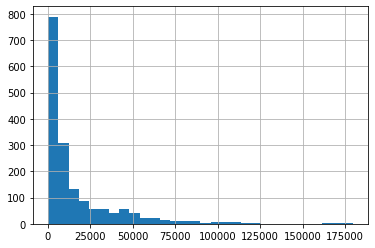

In [62]:
col = 'PIB p/c'
df[col].hist(bins=30);

# ! cambiar fifa[key] por df

<AxesSubplot:>

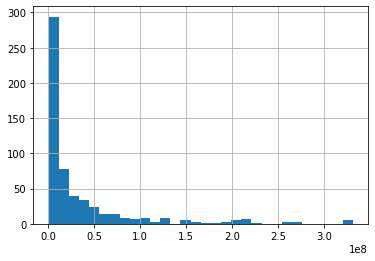

In [261]:
col = 'Population'
fifa[key][col].hist(bins=30)

<AxesSubplot:>

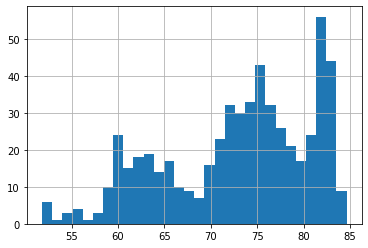

In [262]:
col = 'Life Expectancy'
fifa[key][col].hist(bins=30)

<AxesSubplot:>

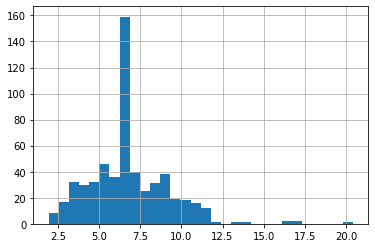

In [263]:
col = 'Current Health Expenditure'
fifa[key][col].hist(bins=30)

<AxesSubplot:>

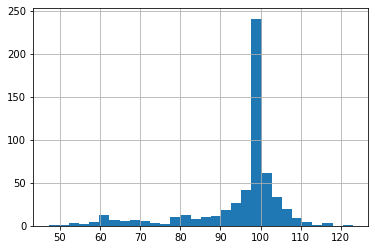

In [264]:
col = 'Primary Completion Rate'
fifa[key][col].hist(bins=30)

<AxesSubplot:>

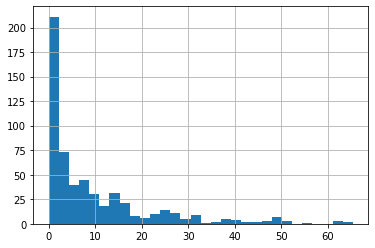

In [265]:
col = 'Prevelance of Food Insecurity'
fifa[key][col].hist(bins=30)

In [50]:
mean_target = fifa[key]['Ranking'].mode()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

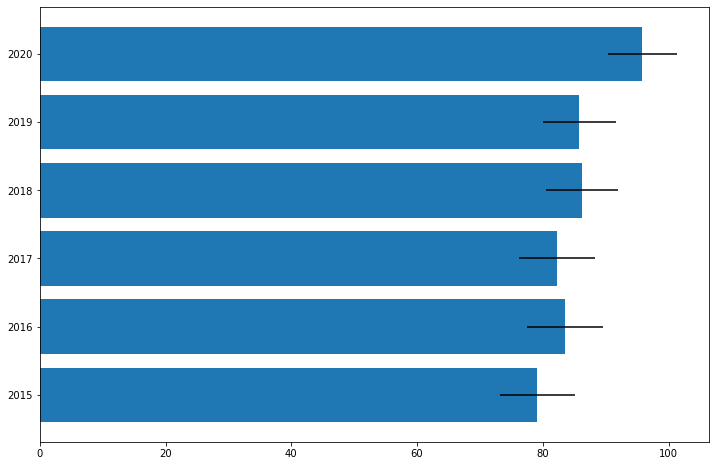

In [51]:
col = 'Year'

agg = fifa[key].groupby(col)['Ranking'].agg(['mean', 'std', 'count'])
agg = agg.sort_values(by='mean')

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(agg.index, agg['mean'], xerr=agg['std'] / np.sqrt(agg['count']))
ax.axvline(mean_target, color='black', linestyle='--')

In [52]:
mean_puntos = fifa[key]['Puntos Totales'].mean()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

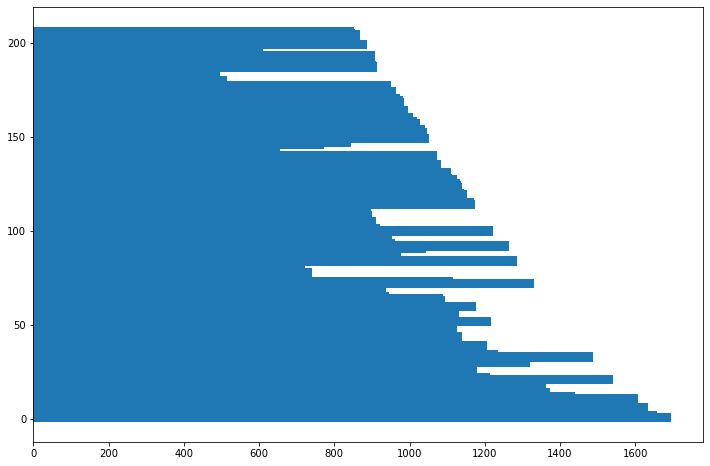

In [53]:
col = 'Ranking'

agg = fifa[key].groupby(col)['Puntos Totales'].agg(['mean', 'std', 'count'])
agg = agg.sort_values(by='mean')

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(agg.index, agg['mean'], height=5)
ax.axvline(mean_target, color='black', linestyle='--')
ax.axvline(mean_puntos, color='red', linestyle='--')

In [ ]:
# sns.pairplot(df, hue = 'Ranking')

In [282]:
#     ## Random Forest Regressor
#     
#     X_train, X_test, y_train, y_test = train_test_split(df.drop('Ranking', 1), df['Ranking'],
#                                                         test_size=0.2, random_state=42)
#     
#     numerical = ['Unemployment Rate', 'PIB p/c',
#                 'Population', 'Life Expectancy',
#                 'Current Health Expenditure', 'Primary Completion Rate',
#                 'Prevelance of Food Insecurity'] 
#     #dropped gini
#     
#     categorical = ['Country Name', 'Country Code', 'Year'] 
#     
#     standard_scaler = StandardScaler()
#     
#     ohe = OneHotEncoder(handle_unknown="ignore") 
#     preprocesador = ColumnTransformer(
#         transformers=[
#             ("num", standard_scaler, numerical),
#             ("cat", ohe, categorical),
#         ]
#     )
#     
#     from sklearn.ensemble import RandomForestRegressor
#     
#     rf = RandomForestRegressor(random_state=42)
#     parametros = {
#                   'model__n_estimators': np.arange(500,1000,50),
#                   'model__max_depth': [3,5,7,10,None]
#                  }
#     
#     pipe = Pipeline(steps=[("pre", preprocesador), ("model", rf)])
#     
#     grid = RandomizedSearchCV(pipe, parametros, n_jobs=-1)
#     
#     #grid = GridSearchCV(pipe, parametros, n_jobs=2)
#     
#     grid.fit(X_train, y_train)
#     print('Modelo entrenado.')
#     
#     grid.best_params_
#     
#     y_pred = grid.best_estimator_.predict(X_train)
#     y_pred = pd.Series(y_pred, name='Pred')
#     y_true = np.array(y_train)
#     y_true = pd.Series(y_true, name='True')
#     
#     fig, ax = plt.subplots()
#     ax.scatter(y_true, y_pred)
#     ax.set_xlabel('True Ranking')
#     ax.set_ylabel('Predicted Ranking')
#     ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='--')
#     
#     y_pred = grid.best_estimator_.predict(X_test)
#     y_pred = pd.Series(y_pred, name='Pred')
#     y_true = np.array(y_test)
#     y_true = pd.Series(y_true, name='True')
#     
#     fig, ax = plt.subplots()
#     ax.scatter(y_true, y_pred)
#     ax.set_xlabel('True Ranking')
#     ax.set_ylabel('Predicted Ranking')
#     ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='--')
#     
#     from sklearn.metrics import r2_score
#     
#     y_pred = grid.best_estimator_.predict(X_test)
#     r2 = r2_score(y_test, y_pred)
#     print("R-squared:", r2)
#     # This measures the proportion of the variance in the target variable that is explained by the model. 
#     #It ranges from 0 to 1, with higher values indicating a better fit.
#   





#     ## SVM
#     
#     X_train, X_test, y_train, y_test = train_test_split(df.drop('Ranking', 1), df['Ranking'],
#                                                         test_size=0.2, random_state=42)
#     
#     numerical = ['Unemployment Rate', 'PIB p/c',         
#                  'Population', 'Life Expectancy',            
#                  'Current Health Expenditure', 'Primary Completion Rate',            
#                  'Prevelance of Food Insecurity'] 
#     #dropped gini
#     
#     categorical = ['Country Name', 'Country Code', 'Year'] 
#     
#     standard_scaler = StandardScaler()
#     ohe = OneHotEncoder(handle_unknown="ignore")
#     
#     preprocesador = ColumnTransformer(
#         transformers=[
#             ("num", standard_scaler, numerical),
#             ("cat", ohe, categorical),
#         ]
#     ) 
#     
#     from sklearn.svm import SVC
#     
#     svm = SVC(random_state=42)
#     parametros = {
#         'model__kernel': ['linear', 'rbf', 'poly'],
#         'model__C': [0.1, 1, 10, 100],
#         'model__gamma': ['scale', 'auto'] + list(np.arange(0.1, 1.1, 0.1)),
#         'model__class_weight': [None, 'balanced']
#     }
#     
#     pipe = Pipeline(steps=[("pre", preprocesador), ("model", svm)]) 
#     
#     grid = RandomizedSearchCV(pipe, parametros, n_jobs=-1) 
#     
#     grid.fit(X_train, y_train)
#     print('Modelo entrenado.')
#     
#     grid.best_params_
#     
#     y_pred = grid.best_estimator_.predict(X_train)
#     y_pred = pd.Series(y_pred, name='Pred')
#     y_true = np.array(y_train)
#     y_true = pd.Series(y_true, name='True')
#     
#     fig, ax = plt.subplots()
#     ax.scatter(y_true, y_pred)
#     ax.set_xlabel('True Ranking')
#     ax.set_ylabel('Predicted Ranking')
#     ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='--')
#     
#     y_pred = grid.best_estimator_.predict(X_test)
#     y_pred = pd.Series(y_pred, name='Pred')
#     y_true = np.array(y_test)
#     y_true = pd.Series(y_true, name='True')
#     
#     fig, ax = plt.subplots()
#     ax.scatter(y_true, y_pred)
#     ax.set_xlabel('True Ranking')
#     ax.set_ylabel('Predicted Ranking')
#     ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='--')
#     
#     y_pred = grid.best_estimator_.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     print("MSE:", mse)
#     #This measures the average squared difference between the predicted and actual values.
#     
#     rmse = np.sqrt(mse)
#     print("RMSE:", rmse)
#     #This is the square root of the mean squared error and is another popular metric for regression problems. 
#     #It is in the same unit as the target variable, which makes it easier to interpret
#     
#     mae = mean_absolute_error(y_test,y_pred)
#     print("MAE:",mae)
#     #This measures the average absolute difference between the predicted and actual values. 
#     #It is less sensitive to outliers than MSE and RMSE.
#     
#     y_pred = grid.best_estimator_.predict(X_test)
#     r2 = r2_score(y_test, y_pred)
#     print("R-squared:", r2)
#     # This measures the proportion of the variance in the target variable that is explained by the model. 
#     #It ranges from 0 to 1, with higher values indicating a better fit.

## Random Forest Classifier -- tomemos este 

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Ranking', 'is_top20'], 1), df['is_top20'],
                                                    test_size=0.2, random_state=42)

In [66]:
numerical = [
             'Unemployment Rate', 
             'PIB p/c',         
             'Population', 
             'Life Expectancy',            
             'Current Health Expenditure', 
             'Primary Completion Rate'
            ] 
#dropped gini,Prevelance of Food Insecurity

categorical = [
               'Country Name', 
               'Country Code', 
               'Year',
              ] 

In [67]:
standard_scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore")

In [68]:
preprocesador = ColumnTransformer(
    transformers=[
        ("num", standard_scaler, numerical),
        ("cat", ohe, categorical),
    ]
) 

In [69]:
rfc = RandomForestClassifier(random_state=42)
parametros = {
              'model__n_estimators': np.arange(500,1000,100),
              'model__max_depth': [3,5,7,10,None]
             }

In [70]:
pipe = Pipeline(steps=[("pre", preprocesador), ("model", rfc)])

In [71]:
grid = RandomizedSearchCV(pipe, parametros, n_jobs=-1)

In [72]:
grid.fit(X_train, y_train)
print('Modelo entrenado.')

Modelo entrenado.


In [156]:
y_pred = grid.predict(X_test)
print('Best parameters:', grid.best_params_)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

Best parameters: {'model__n_estimators': 900, 'model__max_depth': None}
Accuracy: 0.9734
Recall: 0.7500
Precision: 0.9130


In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [83]:
y_pred = grid.best_estimator_.predict(X_train)
y_pred = pd.Series(y_pred, name='Pred')
y_true = np.array(y_train)
y_true = pd.Series(y_true, name='True')

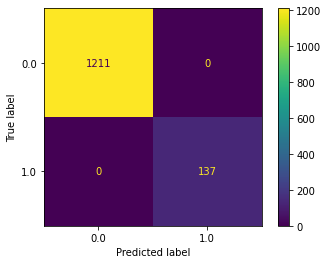

In [84]:
cm = confusion_matrix(y_true, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid.classes_)
disp.plot()
plt.show()

In [85]:
y_pred = grid.best_estimator_.predict(X_test)
y_pred = pd.Series(y_pred, name='Pred')
y_true = np.array(y_test)
y_true = pd.Series(y_true, name='True')

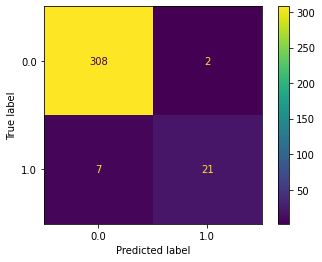

In [86]:
cm = confusion_matrix(y_true, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid.classes_)
disp.plot()
plt.show()

In [93]:
import shap

In [95]:
import sklearn
import shap

In [96]:
X,y = shap.datasets.adult()
X["Occupation"] *= 1000 # to show the impact of feature scale on KNN predictions
X_display,y_display = shap.datasets.adult(display=True)
X_train_, X_valid_, y_train_, y_valid_ = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [97]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train_, y_train_)

KNeighborsClassifier()

In [99]:
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train_.median().values.reshape((1,X_train_.shape[1]))

In [108]:
explainer = shap.Explainer(f, med)
shap_values = explainer(X_valid_.iloc[0:1000,:])

Permutation explainer: 1001it [01:39,  9.61it/s]                                                                       


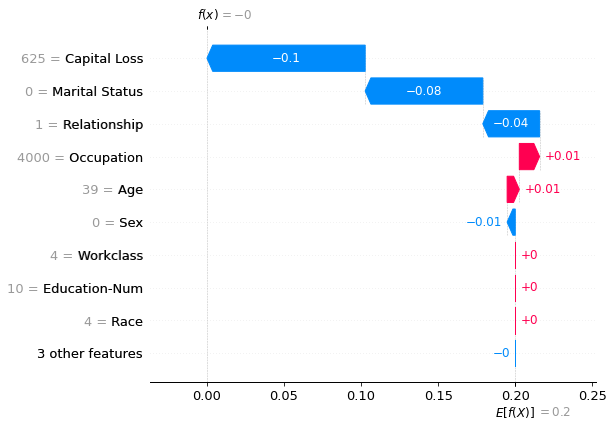

In [109]:
shap.plots.waterfall(shap_values[0])

In [114]:
X_test.shape

(338, 10)

In [119]:
predict_proba

<function __main__.<lambda>(x)>

In [205]:
grid.best_estimator_.named_steps['model']

RandomForestClassifier(n_estimators=900, random_state=42)

In [207]:
# Create a SHAP explainer object for the fitted model
explainer = shap.Explainer(grid.best_estimator_.named_steps['model'])

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# # Plot the SHAP values for the first instance in the test set
# shap.plots.waterfall(shap_values[0], max_display=10)

# # Plot the feature importance using SHAP summary plot
# shap.summary_plot(shap_values, X_test, plot_type='bar')

ValueError: could not convert string to float: 'Russian Federation'

In [211]:
X_test_preprocessed

<338x393 sparse matrix of type '<class 'numpy.float64'>'
	with 3042 stored elements in Compressed Sparse Row format>

In [215]:
preproc(X_test)

<338x393 sparse matrix of type '<class 'numpy.float64'>'
	with 3042 stored elements in Compressed Sparse Row format>

In [218]:
X_test_preprocessed

<338x393 sparse matrix of type '<class 'numpy.float64'>'
	with 3042 stored elements in Compressed Sparse Row format>

In [219]:
preproc = grid.best_estimator_.steps[0][1].transform

def predict_proba(x):
    return grid.best_estimator_.steps[1][1].predict_proba(x)[:,1]

# Preprocess the test data
X_test_preprocessed = preproc(X_test).reshape(X_test.shape[0], -1)

# Create the SHAP explainer object
explainer_top20 = shap.Explainer(predict_proba, X_test_preprocessed)

# Compute the SHAP values for the test set
shap_values_top20 = explainer_top20(X_test_preprocessed)

DimensionError: The passed data does not match the background shape expected by the masker! The data of shape (1, 393) was passed while the masker expected data of shape (393,).

In [223]:
explainer_top20.masker.

In [214]:
preproc = grid.best_estimator_.steps[0][1].transform
X_test_preprocessed = preproc(X_test).reshape(X_test.shape[0], -1)

def predict_proba(x):
    return grid.best_estimator_.steps[1][1].predict_proba(x)[:,1]

explainer_top20 = shap.Explainer(predict_proba, X_test_preprocessed)
shap_values_top20 = explainer_top20(X_test_preprocessed)

DimensionError: The passed data does not match the background shape expected by the masker! The data of shape (1, 393) was passed while the masker expected data of shape (393,).

In [229]:
X_test_preprocessed.reshape()

(338, 393)

In [226]:
preproc = grid.best_estimator_.steps[0][1].transform
X_test_preprocessed = preproc(X_test).reshape(X_test.shape[0], -1)

def custom_masker(shape):
    return shap.maskers.Independent(lambda x: x, shape=shape)

def predict_proba(x):
    return grid.best_estimator_.steps[1][1].predict_proba(x)[:,1]

# Create the SHAP explainer object with the custom masker function
explainer_top20 = shap.Explainer(predict_proba, X_test_preprocessed, masker=custom_masker(X_test_preprocessed.shape))



# explainer_top20 = shap.Explainer(predict_proba, X_test_preprocessed)
# shap_values_top20 = explainer_top20(X_test_preprocessed)

TypeError: __init__() got an unexpected keyword argument 'shape'

In [227]:
preproc = grid.best_estimator_.steps[0][1].transform

def predict_proba(x):
    return grid.best_estimator_.steps[1][1].predict_proba(x)[:,1]

# Preprocess the test data
X_test_preprocessed = preproc(X_test).reshape(X_test.shape[0], -1)

# Define a custom masker function that matches the shape of the preprocessed data
def custom_masker(shape):
    return shap.maskers.Independent(lambda x: x, shape=shape)

# Create the SHAP explainer object with the custom masker function
explainer_top20 = shap.Explainer(predict_proba, X_test_preprocessed, masker=custom_masker(X_test_preprocessed.shape))

# Compute the SHAP values for the test set
shap_values_top20 = explainer_top20(X_test_preprocessed)

TypeError: __init__() got an unexpected keyword argument 'shape'

In [239]:
X_test_preprocessed.toarray()[0, :].reshape(-1, 1)

(393, 1)

In [288]:
preproc = grid.best_estimator_.steps[0][1].transform

def predict_proba(x):
    return grid.best_estimator_.steps[1][1].predict_proba(x)[:,1]

# Preprocess the test data
X_test_preprocessed = preproc(X_test).reshape(X_test.shape[0], -1)

# Create the SHAP explainer object with the custom masker function
explainer_top20 = shap.Explainer(predict_proba, 
                                 masker = shap.maskers.Independent(X_test_preprocessed))

# Compute the SHAP values for the test set
# prueba = X_test_preprocessed[0, :].toarray().flatten()
# shap_values_top20 = explainer_top20(prueba)
prueba = X_test_preprocessed[0, :]
shap_values_top20 = explainer_top20(prueba)

DimensionError: The passed data does not match the background shape expected by the masker! The data of shape (1, 393) was passed while the masker expected data of shape (393,).

In [287]:
prueba

array([-0.44253798, -0.09891524,  0.69604184, -0.23523178, -0.48590227,
        0.47273335,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [231]:
from eli5.sklearn import PermutationImportance
import shap

In [233]:
shap.__version__

'0.41.0'

In [232]:
# create a permutation importance object with the trained model and test set
masker = shap.maskers.Categorical(impute_value=-1)

AttributeError: module 'shap.maskers' has no attribute 'Categorical'

In [ ]:
perm = PermutationImportance(grid.best_estimator_['model'], cv=None, refit=False, n_iter=5, random_state=42, scoring='roc_auc', 
                             n_jobs=-1, verbose=2, pre_dispatch='2*n_jobs', sample_weight=None, masker=masker).fit(X_test, y_test)

In [272]:
from sklearn.inspection import permutation_importance
r = permutation_importance(grid.best_estimator_, X_test, y_test, n_repeats=10, random_state=0, )

In [277]:
features = numerical + categorical

In [279]:
len(features)

9

In [281]:
len(r.importances_mean)

10

In [284]:
X_test.columns

Index(['Country Name', 'Country Code', 'Year', 'Unemployment Rate', 'PIB p/c',
       'Population', 'Life Expectancy', 'Current Health Expenditure',
       'Primary Completion Rate', 'Puntos Totales'],
      dtype='object')

In [283]:
X_test.shape

(338, 10)

In [286]:
for i in r.importances_mean.argsort()[::-1]:
    print(i)
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f"{X_test.columns[i]:<8}"
          f"  {r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")

0
Country Name  0.017 +/- 0.001
5
Population  0.016 +/- 0.003
1
Country Code  0.014 +/- 0.001
4
PIB p/c   0.009 +/- 0.004
3
Unemployment Rate  0.005 +/- 0.003
7
Current Health Expenditure  0.004 +/- 0.002
8
Primary Completion Rate  0.003 +/- 0.001
6
Life Expectancy  0.003 +/- 0.002
2
Year      0.002 +/- 0.002
9
Puntos Totales  0.000 +/- 0.000


In [268]:
from eli5.sklearn import PermutationImportance
import shap

class MyMasker(shap.maskers.Independent):
    def __init__(self, df):
        super().__init__(df)
        self.impute_values = [-1] * df.shape[1]  
        
# create a permutation importance object with the trained model and test set
masker = MyMasker(X_test)
perm = PermutationImportance(grid.best_estimator_['model'], cv=None, refit=False, n_iter=5, 
                             random_state=42, scoring='roc_auc').fit(X_test, y_test)

ValueError: could not convert string to float: 'Russian Federation'

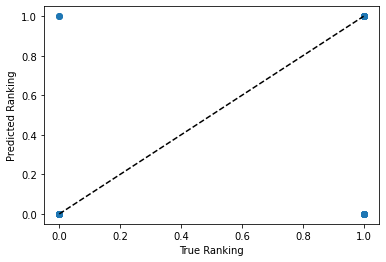

In [87]:
# fig, ax = plt.subplots()
# ax.scatter(y_true, y_pred)
# ax.set_xlabel('True Ranking')
# ax.set_ylabel('Predicted Ranking')
# ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='--')

In [278]:
# y_pred = grid.best_estimator_.predict(X_test)
# y_pred = pd.Series(y_pred, name='Pred')
# y_true = np.array(y_test)
# y_true = pd.Series(y_true, name='True')

In [88]:
# fig, ax = plt.subplots()
# ax.scatter(y_true, y_pred)
# ax.set_xlabel('True Ranking')
# ax.set_ylabel('Predicted Ranking')
# ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='--')

## XG Boost

In [ ]:
! pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Ranking', 1), df['Ranking'],
                                                    test_size=0.2, random_state=42) 

In [ ]:
numerical = ['Unemployment Rate', 'PIB p/c', 'Population', 'Life Expectancy',             
             'Current Health Expenditure', 'Primary Completion Rate',             
             'Prevelance of Food Insecurity'] 

#dropped gini
categorical = ['Country Name', 'Country Code', 'Year'] 

In [ ]:
standard_scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore") 

preprocesador = ColumnTransformer(
    transformers=[
        ("num", standard_scaler, numerical),
        ("cat", ohe, categorical),
    ]
) 

In [ ]:
xgb = XGBClassifier(random_state=42)

In [ ]:
parametros = {
    'model__learning_rate': np.arange(0.05, 0.3, 0.05),
}

In [ ]:
pipe = Pipeline(steps=[("pre", preprocesador), ("model", xgb)]) 

In [ ]:
grid = RandomizedSearchCV(pipe, parametros, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)
print('Modelo entrenado.')

In [ ]:
y_pred = grid.best_estimator_.predict(X_train)
y_pred = pd.Series(y_pred, name='Pred')
y_true = np.array(y_train)
y_true = pd.Series(y_true, name='True')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred)
ax.set_xlabel('True Ranking')
ax.set_ylabel('Predicted Ranking')
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='--')

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
y_pred = pd.Series(y_pred, name='Pred')
y_true = np.array(y_test)
y_true = pd.Series(y_true, name='True')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred)
ax.set_xlabel('True Ranking')
ax.set_ylabel('Predicted Ranking')
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='--')

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
#This measures the average squared difference between the predicted and actual values.

In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)
#This is the square root of the mean squared error and is another popular metric for regression problems. 
#It is in the same unit as the target variable, which makes it easier to interpret

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
#This measures the average absolute difference between the predicted and actual values. 
#It is less sensitive to outliers than MSE and RMSE.

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
# This measures the proportion of the variance in the target variable that is explained by the model. 
#It ranges from 0 to 1, with higher values indicating a better fit.

### Under/Over Fitting

In [ ]:
##posible over fitting

## Interpretabilidad

    SHAP
    LIME
    Permutation Importance